In [3]:
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 65.9 MB/s 


In [4]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
Data = pd.read_csv('/content/Churn_Modelling.csv')

In [7]:
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
Data.isnull().values.any()

False

In Dataset feature 'RoWNumber' , 'CustomerId' , 'Surname' can be removed as these are possessing no importance in target. And dummies canbe considered for the feature 'Geography' , 'Gender' with drop_first parameters as these are categorical fatures.

In [9]:
geography = pd.get_dummies(Data['Geography'], drop_first= True)

In [10]:
gender = pd.get_dummies(Data['Gender'], drop_first= True)

In [11]:
Data = Data.drop(['Geography','Gender'],axis =1)

In [12]:
Data = pd.concat([Data,geography,gender],axis =1)

In [13]:
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
Data_X = Data.drop(['Exited'],axis =1)

In [15]:
Data_X.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
Data_X.shape

(10000, 14)

In [17]:
X = Data_X.iloc[:,3:]

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [19]:
y = Data.iloc[:,11]

In [20]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [21]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

Feature scaling using the entire dataset risks information leakage.Some algorithms may not necessarily need feature scaling, like decision trees.

***** Why fit_transform to train data and only transform to test data???????
because to avoid data leakage

In [22]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [24]:
X_train.shape

(8000, 11)

In [25]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [26]:
X_test.shape

(2000, 11)

# Create ANN

In [31]:
import tensorflow
from tensorflow.keras.models import Sequential             # Sequential model relates to forward and back propagation
from tensorflow.keras.layers import Dense                  # Dense layer relates to I/O,HL,O/T layer
from tensorflow.keras.layers import ReLU                   # import Activation functions
from tensorflow.keras.layers import Dropout                # import dropout layer                  

In [42]:
Classifier = Sequential()                                  #Assigning classifier as sequential neural network model
Classifier.add(Dense(units = 11, activation = 'relu'))     #Assigning Input layer as Dense layer
Classifier.add(Dense(units = 6, activation = 'relu'))      #Assigning Hidden Layer 1
Classifier.add(Dropout(0.3))                               #Addidng dropout layer
Classifier.add(Dense(units = 6, activation = 'relu'))      #Assigning Hidden layer 2
Classifier.add(Dense(units = 1, activation = 'sigmoid'))   #Assigning output layer 

In [43]:
#Compiling ANN
Optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
Classifier.compile(optimizer=Optimizer,loss='binary_crossentropy', metrics=['accuracy'])         
#Classifier is ready to be trained and configured with learning_rate, cost_function and metrics

In [44]:
#Early_Stopping:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience = 20,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [45]:
ANN_model = Classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10, epochs=100, callbacks = early_stopping)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.4663 - accuracy: 0.7990 - val_loss: 0.4491 - val_accuracy: 0.8183
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4296 - accuracy: 0.8169 - val_loss: 0.4429 - val_accuracy: 0.8122
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3991 - accuracy: 0.8360 - val_loss: 0.3906 - val_accuracy: 0.8410
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3833 - accuracy: 0.8423 - val_loss: 0.3903 - val_accuracy: 0.8485
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3681 - accuracy: 0.8477 - val_loss: 0.3968 - val_accuracy: 0.8478
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3668 - accuracy: 0.8498 - val_loss: 0.3791 - val_accuracy: 0.8466
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3648 - accuracy: 0.8494 - val_loss: 0.3751 - val_accuracy: 0.8519

Here total records of train_data is 8000...0.33 % of 8000 goes to validation data and remains 5360 goes to train data...As batch size is 10, here we have 536 batch....So 536 iterations during each epoch.....

In [46]:
ANN_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

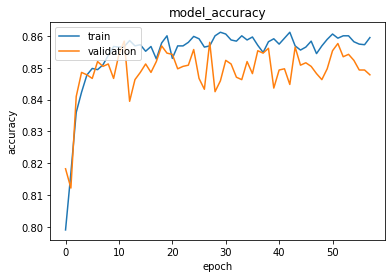

In [47]:
#Visualization
plt.plot(ANN_model.history['accuracy'])
plt.plot(ANN_model.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

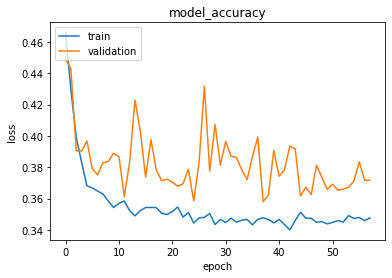

In [48]:
#Visualization
plt.plot(ANN_model.history['loss'])
plt.plot(ANN_model.history['val_loss'])
plt.title('model_accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [49]:
#Evaluation_of_models
y_pred = Classifier.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)

In [58]:
cm

array([[1548,   47],
       [ 224,  181]])

In [59]:
score

0.8645

In [65]:
Classifier.get_weights()

[array([[-2.15181381e-01, -1.27874529e-02, -2.16864660e-01,
          2.46712184e+00, -5.47506273e-01, -8.82635731e-03,
         -3.65202546e-01,  3.12818527e-01,  1.88049182e-01,
          3.48715135e-03, -2.70514518e-01],
        [-1.49495959e-01, -4.00685549e+00, -1.16667755e-01,
         -1.14322269e+00,  2.12387633e+00,  1.31273672e-01,
         -3.92975926e+00, -3.89251065e+00, -1.48055375e+00,
         -8.93954039e-01, -2.54806423e+00],
        [-7.64371306e-02,  3.18363398e-01,  8.24414432e-01,
         -4.21975195e-01,  3.00194561e-01,  9.27597523e-01,
         -1.09024441e+00,  5.47324181e-01,  7.26516843e-01,
         -7.52731144e-01, -7.44926870e-01],
        [ 7.79131293e-01, -1.87413514e-01, -2.87820292e+00,
          4.67289723e-02, -1.24890432e-01, -1.11200142e+00,
         -7.64267445e-01,  1.71165979e+00, -3.11486244e+00,
         -1.85355234e+00,  4.56659257e-01],
        [ 4.57190943e+00,  5.99662185e-01, -2.63457632e+00,
         -7.62577772e-01,  4.31019932e-01,  

In [66]:
Classifier.save('Model.h5')

In [68]:
from tensorflow.keras.models import load_model

In [69]:
savedModel=load_model('/content/Model.h5')
savedModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


*****Model parametrs are weights and bias for neural network
ANN,CNN,RNN are Black Box Models as internal weights and bias cant be monitored and seen....beyond certain level.....White box models are basically Decision Tree and Linear Regression where what is happening internally can be foreseen...